# HW 08

> Back Bay National Wildlife Refuge is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish.

![BNWR](https://www.fws.gov/sites/default/files/styles/banner_image_xl/public/banner_images/2020-09/waterfowl%20%28tundras%29.jpg?h=0c8d0f81&itok=NcZlpD27)


To get introduced to the park and its history, please view the following interactive story map.

[BBNWR History and Introduction](https://storymaps.arcgis.com/stories/960d9db38cca4f3d8d38111119b9874f)

Additionally, here is some drone footage of the park for a better look at the geography and ecology of the area.

[BBNWR Drone Footage](https://www.youtube.com/watch?v=NlW330aBTCc)

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
bbnwr = pd.read_csv("./BKB_WaterQualityData_2020084.csv")
bbnwr["Site_Id"] = bbnwr["Site_Id"].replace("d", "D")
bbnwr.columns

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')

## Question 1


### Part (a)

Plot the distribution of "Water Depth (m)". Comment on this distribution. What do you notice? Calculate a numerical summary that expresses this main feature of the plot.

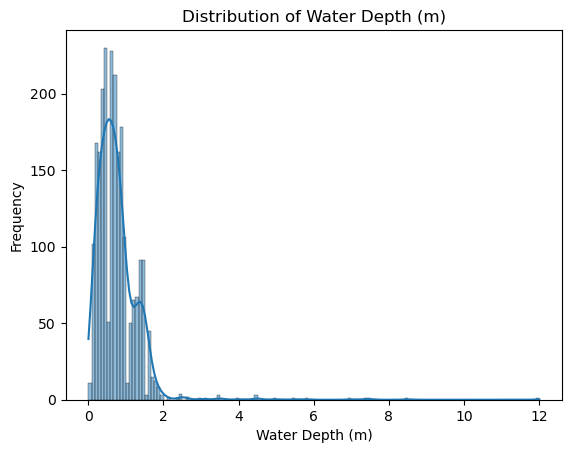

count    2300.000000
mean        0.762559
std         0.621140
min         0.010000
25%         0.400000
50%         0.650000
75%         0.950000
max        12.000000
Name: Water Depth (m), dtype: float64


In [5]:
# answer 

import matplotlib.pyplot as plt

# Plot the distribution of "Water Depth (m)"
sb.histplot(bbnwr["Water Depth (m)"].dropna(), kde=True)
plt.title("Distribution of Water Depth (m)")
plt.xlabel("Water Depth (m)")
plt.ylabel("Frequency")
plt.show()

# Calculate a numerical summary
water_depth_summary = bbnwr["Water Depth (m)"].describe()
print(water_depth_summary)

# comment: the distribution of water depth is right-skewed, with a median of 0.65 m and a mean of 0.76 m. The minimum water depth is 0.01 m and the maximum water depth is 12 m.


### Part (b)

In this problem we will treat the values of "Water Depth (m)" as a population. Pull out this column by itself into a variable (`waterdepth`). Remove all missing values.

For this population, compute the mean and standard deviation.

In [7]:
# population mean and std dev
waterdepth = bbnwr["Water Depth (m)"].dropna()
population_mean = waterdepth.mean()
population_std_dev = waterdepth.std()

print("Population Mean:", population_mean)
print("Population Standard Deviation:", population_std_dev)

Population Mean: 0.7625586956521738
Population Standard Deviation: 0.6211403896690008


Using theoretical results from class, for a sample size of $n = 20$ units, calculate the *theoretical* mean and standard error of a sample mean of water depths using a simple random sample. Print out the values.

In [8]:
# theoretical mean and std error of sample mean
n = 20
theoretical_mean = population_mean
theoretical_se = population_std_dev / np.sqrt(n)

print("Theoretical Mean:", theoretical_mean)
print("Theoretical Standard Error:", theoretical_se)

Theoretical Mean: 0.7625586956521738
Theoretical Standard Error: 0.13889121348705938


### Part (c)

Create a simulation of taking samples of 20 units and compute the sample mean. Repeat this simulation 1000 times. In order to ensure that our "population" is sufficiently large, use the `replace = True` option to the `sample` method.

Using the results, calculate the **empirical** mean and standard error of the mean. We would not expect it to be exactly the same as the values calculated in the previous part, but it should be close.

In [22]:
# simulation
sample_means = []
for _ in range(1000):
    sample = waterdepth.sample(n=20, replace=True)
    sample_means.append(sample.mean())

# Calculate empirical mean and standard error
empirical_mean = np.mean(sample_means)
empirical_se = np.std(sample_means)

print("Empirical Mean:", empirical_mean)
print("Empirical Standard Error:", empirical_se)

Empirical Mean: 0.75777625
Empirical Standard Error: 0.13724578499333778


### Part (d)

Repeat Part (c) for a sample size of 1000. Graph the two distributions (use two code cells so that they get separate plots). What do you notice? Look carefully at the scales and at the shape of each distribution.

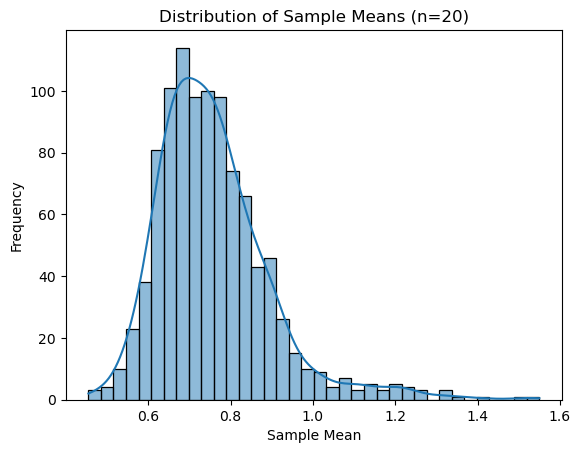

In [26]:
# Simulation 
sample_means_1000 = []
for _ in range(1000):
    sample = waterdepth.sample(n=1000, replace=True)
    sample_means_1000.append(sample.mean())

# Plot the distribution of sample means for n=20
sb.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means (n=20)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


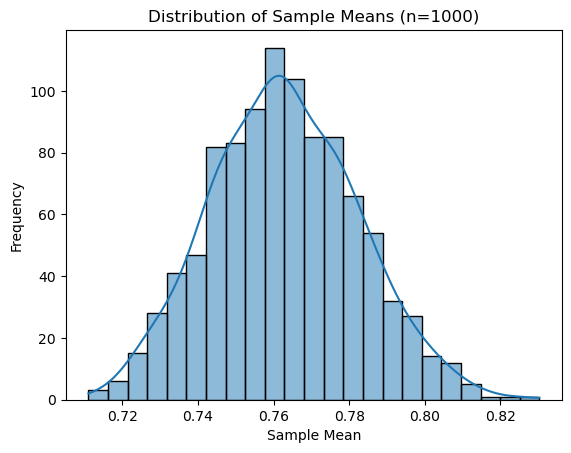

In [28]:
# Plot the distribution of sample means for n=1000
sb.histplot(sample_means_1000, kde=True)
plt.title("Distribution of Sample Means (n=1000)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()



# larfe smample size is better because the distribution of sample means is more normally distributed and the standard error is smaller. This is consistent with the Central Limit Theorem.

### Part (e)

According to the Gaussian empirical rule, 68% of observations should be within one standard error of the theoretical mean for $\bar X$.

For the two simulations, compute the empirical probability of an observation falling within one (theoretical) SEM of the (theoretical) mean of $\bar X$. (Note: you will need to calculate the SEM for the sample mean of samples of size

In [ ]:
# empirical mean of sample means and standard error

# Calculate the empirical probability for n=20
within_one_se_20 = np.mean((np.array(sample_means) >= (theoretical_mean - theoretical_se)) & 
                           (np.array(sample_means) <= (theoretical_mean + theoretical_se)))

# Calculate the empirical probability for n=1000
theoretical_se_1000 = population_std_dev / np.sqrt(1000)
within_one_se_1000 = np.mean((np.array(sample_means_1000) >= (theoretical_mean - theoretical_se_1000)) & 
                             (np.array(sample_means_1000) <= (theoretical_mean + theoretical_se_1000)))

print("Empirical Probability within one SEM for n=20:", within_one_se_20)
print("Empirical Probability within one SEM for n=1000:", within_one_se_1000)



Empirical Probability within one SEM for n=20: 0.771
Empirical Probability within one SEM for n=1000: 0.687


Comment on what you see. In particular, do you think the Central Limit Theorem would apply to a sample of 20 for this population? What about a sample of size 1000?

The sample size of 20 does not accurately capture 68% data within its one sd, but the sample size of 1000 does a good job. IN this case, the CLT does not apply to a sample of 20. It applies to a sample of size 1000.

## Question 2

### Part (a)
As you probably noticed, the water depth measure is rather skewed. Select a transformation that minimizes the coefficient of skewness. Implement this and save it as `water_xform`.

In [30]:
# transformation

# Apply a log transformation to minimize skewness
water_xform = np.log1p(waterdepth)

# Check the skewness of the transformed data
skewness = water_xform.skew()
print("Skewness of transformed data:", skewness)

Skewness of transformed data: 1.1318374622473037


### Part (b)

Repeat the two simulations ($n = 20$, $n = 1000$) using the un-skewed water depth and compute the proportion of observations that fall within with one SEM. Note that you will need to recalculate the theoretical mean and standard error based on the transformed values.

In [32]:
# simulations

# Recalculate theoretical mean and standard error based on transformed values
transformed_mean = water_xform.mean()
transformed_std_dev = water_xform.std()

# Theoretical standard error for n=20 and n=1000
transformed_se_20 = transformed_std_dev / np.sqrt(20)
transformed_se_1000 = transformed_std_dev / np.sqrt(1000)

# Simulation for n=20
transformed_sample_means_20 = []
for _ in range(1000):
    sample = water_xform.sample(n=20, replace=True)
    transformed_sample_means_20.append(sample.mean())

# Simulation for n=1000
transformed_sample_means_1000 = []
for _ in range(1000):
    sample = water_xform.sample(n=1000, replace=True)
    transformed_sample_means_1000.append(sample.mean())

# Calculate the empirical probability for n=20
within_one_se_transformed_20 = np.mean((np.array(transformed_sample_means_20) >= (transformed_mean - transformed_se_20)) & 
                                       (np.array(transformed_sample_means_20) <= (transformed_mean + transformed_se_20)))

# Calculate the empirical probability for n=1000
within_one_se_transformed_1000 = np.mean((np.array(transformed_sample_means_1000) >= (transformed_mean - transformed_se_1000)) & 
                                         (np.array(transformed_sample_means_1000) <= (transformed_mean + transformed_se_1000)))

print("Empirical Probability within one SEM for transformed data (n=20):", within_one_se_transformed_20)
print("Empirical Probability within one SEM for transformed data (n=1000):", within_one_se_transformed_1000)

Empirical Probability within one SEM for transformed data (n=20): 0.679
Empirical Probability within one SEM for transformed data (n=1000): 0.678


### Part (c)

Comment the results of Question 1 and Question 2. What do we see about the quality of the Central Limit Theorem approximation in these two cases?

The quality of CLT is notably increase for sample size of 20 after the log transformation. It shows that CLT works better on normally distributed data. 

## Question 3

### Part (a)

Create a table that has only the log of "Water Depth (m)" and "Year" as values. Limit the table to years after 1980. Drop any rows with missing values. Call this table `water_year`.

Plot these values in a scatter plot.

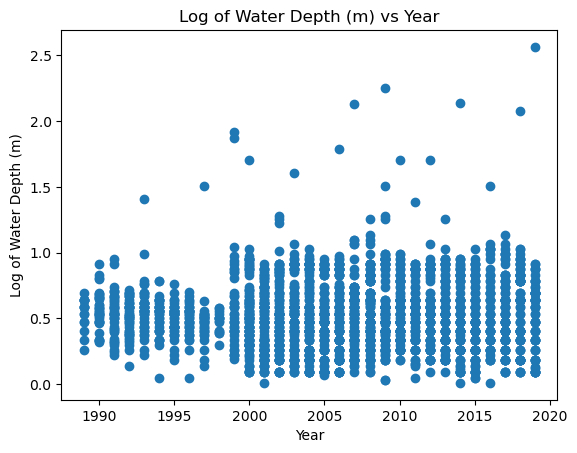

In [33]:
# scatter plot

# Create the table
water_year = bbnwr[bbnwr["Year"] > 1980][["Year", "Water Depth (m)"]].dropna()
water_year["Water Depth (m)"] = np.log1p(water_year["Water Depth (m)"])

# Plot the scatter plot
plt.scatter(water_year["Year"], water_year["Water Depth (m)"])
plt.title("Log of Water Depth (m) vs Year")
plt.xlabel("Year")
plt.ylabel("Log of Water Depth (m)")
plt.show()

### Part (b)

Treating `water_year` as a population, take samples of size $n = 100$ (using `replace = True` again). For each, calculate the correlation of log water depth and year.

Compare average the correlation coefficient with the "population" correlation coefficient of the `water_year` table. Evaluate the standard deviation of the sampling distribution and compare it to the theoretical standard error ($1/\sqrt{n}$).

In [35]:
# simulation and comparison

# Calculate the population correlation coefficient
population_corr = water_year.corr().iloc[0, 1]

# Simulation for n=100
sample_corrs = []
for _ in range(1000):
    sample = water_year.sample(n=100, replace=True)
    sample_corr = sample.corr().iloc[0, 1]
    sample_corrs.append(sample_corr)

# Calculate the average correlation coefficient
average_sample_corr = np.mean(sample_corrs)

# Calculate the standard deviation of the sampling distribution
std_dev_sample_corr = np.std(sample_corrs)

# Theoretical standard error
theoretical_se_corr = 1 / np.sqrt(100)

print("Population Correlation Coefficient:", population_corr)
print("Average Sample Correlation Coefficient:", average_sample_corr)
print("Standard Deviation of Sampling Distribution:", std_dev_sample_corr)
print("Theoretical Standard Error:", theoretical_se_corr)

# Sample correlation coefficients are close to the population correlation coefficient. The standard deviation of the sampling distribution is consistent with the theoretical standard error. This is consistent with the Central Limit Theorem.

Population Correlation Coefficient: 0.032224804898164996
Average Sample Correlation Coefficient: 0.032562685882902
Standard Deviation of Sampling Distribution: 0.09452944734087138
Theoretical Standard Error: 0.1
